### Group Members:
* Courtney Mueller
* Angel Camacho
* Matthew Grover

In [1]:
# importing potentially necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from math import sqrt

## First Dataset: [FirstDataset](https://www.kaggle.com/datasets/jummyegg/rawg-game-dataset/code?resource=download)
#### Display information about rows and columns in dataset:

In [2]:
df1 = pd.read_csv('game_info.csv') # read in the dataset
print("shape: ", df1.shape) # display dataset information
df1.head() # print first few lines of dataset#
df1

shape:  (345667, 27)


,id,slug,name,metacritic,released,tba,updated,website,rating,rating_top,...,developers,genres,publishers,esrb_rating,added_status_yet,added_status_owned,added_status_beaten,added_status_toplay,added_status_dropped,added_status_playing
0,1,dgeneration-hd,D/Generation HD,NaN,2015-10-23,False,2019-09-17T11:58:57,http://dgeneration.net,0.0,0,...,West Coast Software||West Coast Software Limited,Adventure||Puzzle,West Coast Software||West Coast Software Limited,Everyone 10+,3,70,0,2,0,0
1,10,g-prime,G Prime Into The Rain,NaN,2016-01-06,False,2019-11-06T23:04:19,NaN,0.0,0,...,Soma Games,Simulation||Indie,Code-Monkeys||Code-Monkeys LLC||Immanitas Ente...,Everyone,0,39,0,1,0,0
2,100,land-sliders,Land Sliders,NaN,2015-09-24,False,2019-10-22T13:56:16,http://prettygreat.com,0.0,0,...,Prettygreat Pty. Ltd.,Adventure||Arcade,Prettygreat Pty. Ltd.,Everyone 10+,0,0,1,1,1,0
3,1000,pixel-gear,Pixel Gear,NaN,2016-10-20,False,2019-08-28T22:16:02,https://www.facebook.com/Geronimo-Interactive-...,0.0,0,...,Oasis Games Limited||Geronimo Interactive,Action||Indie,Geronimo Interactive,Teen,0,0,0,2,0,0
4,10000,gods-and-idols,Gods and Idols,NaN,2016-12-12,False,2019-09-17T13:37:13,http://www.godsandidols.com/,0.0,0,...,Viking Tao,RPG||Strategy||Massively Multiplayer,Viking Tao,NaN,1,57,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345662,99994,holy-or-dead,Holy or Dead,NaN,2017-05-17,False,2019-01-09T12:41:06,NaN,0.0,0,...,Ralidon,NaN,NaN,NaN,0,0,0,0,0,0
345663,99995,airstrike-hd-demo,Airstrike HD Demo,NaN,2016-03-04,False,2019-01-09T12:41:06,NaN,0.0,0,...,Fifth Dimension Company,Action,NaN,NaN,0,0,0,0,0,0
345664,99997,uranias-mirror,Urania's Mirror,NaN,2016-04-25,False,2019-01-09T12:41:06,NaN,0.0,0,...,sneakthief,Adventure,NaN,NaN,0,0,0,0,0,0
345665,99998,simucities,Simucities,NaN,2017-05-26,False,2019-01-09T12:41:06,NaN,0.0,0,...,keypixels,NaN,NaN,NaN,0,0,0,0,0,0


#### Table displaying information for genre:
The above dataset information about various video game titles including its publisher and development company. Below we plot this information and display genre frequency. We base this upon the genre count information given in the dataset as well. Based on the data gathered in our dataset it can be determined that we have a sufficient amount of information on the game titles given in order to produce recommendations

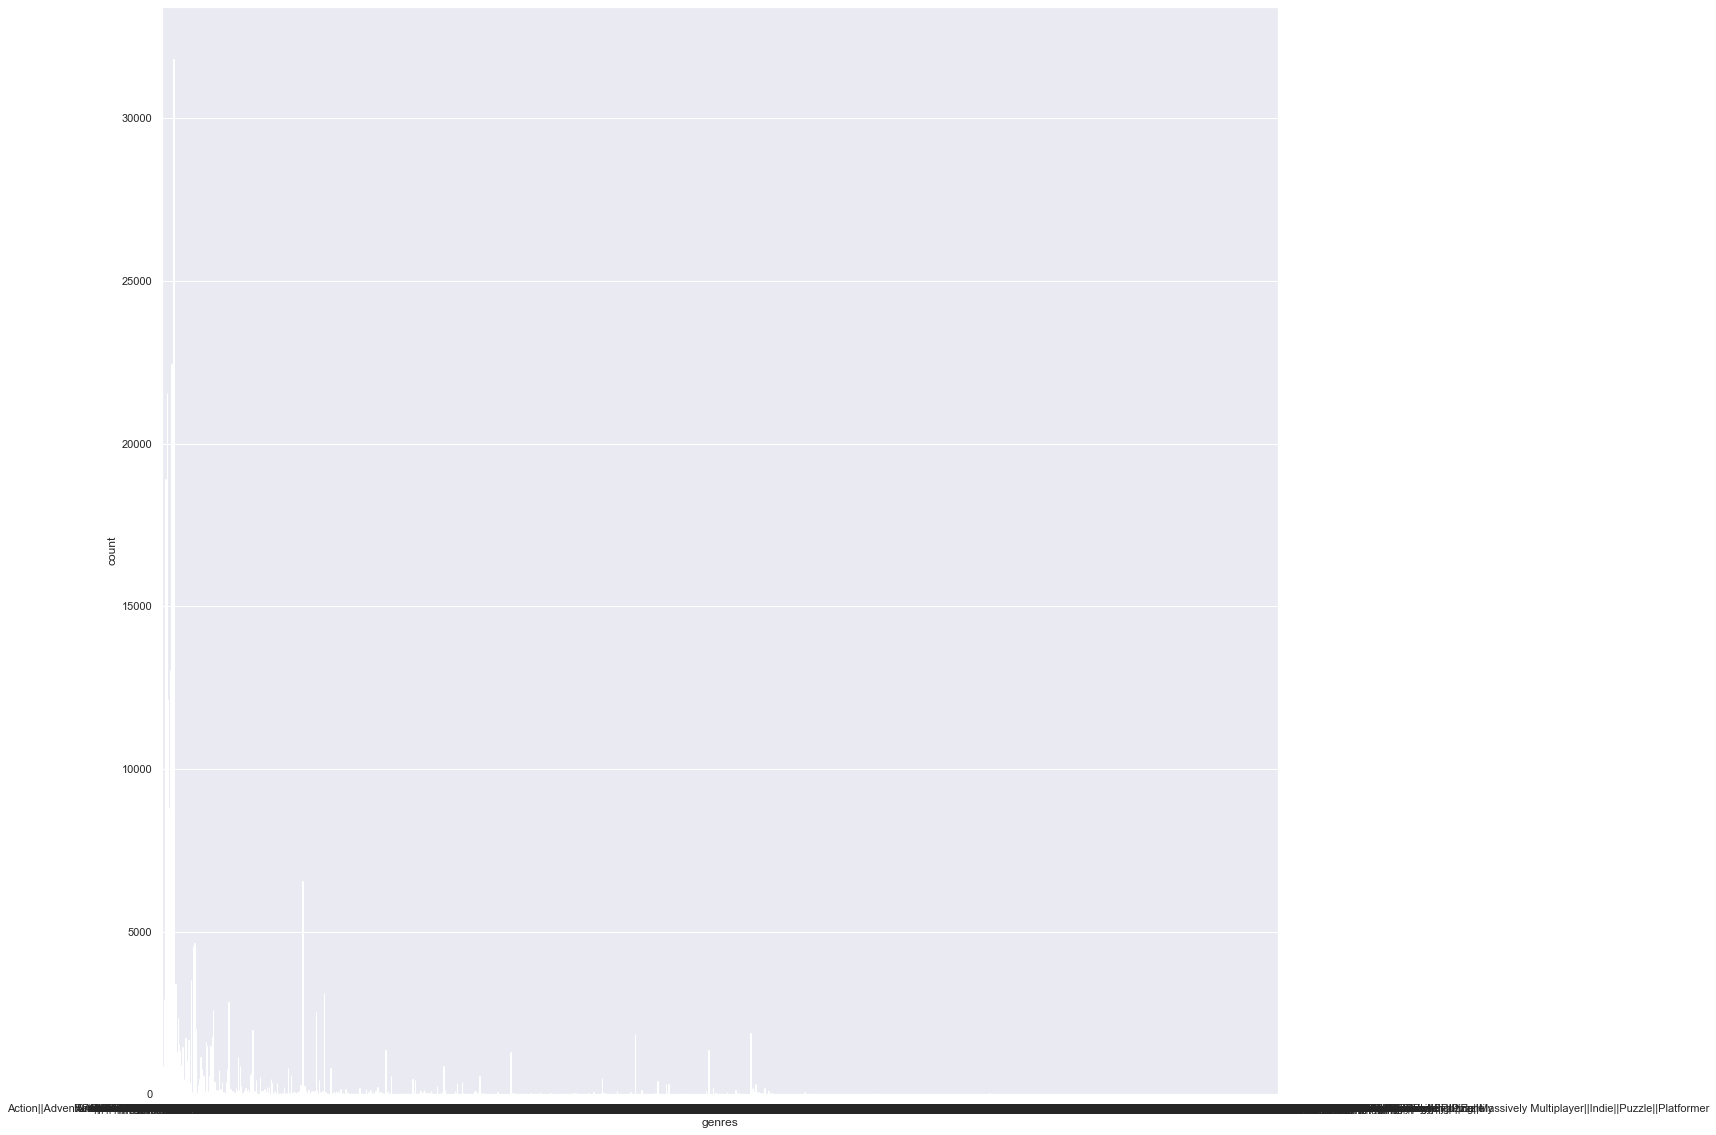

In [3]:
# Table dispaying information for genre
sns.set(rc={"figure.figsize":(20, 20)}) #width = 8, height = 4
ax = sns.countplot(x="genres",data=df1)


## Second Dataset: [SecondDataset](https://www.kaggle.com/datasets/gregorut/videogamesales)
#### Display information about rows and columns in dataset:

In [5]:
df2 = pd.read_csv('vgsales.csv') # read in the dataset
print("shape: ",df2.shape) # display dataset information
df2.head() # print first few lines of dataset

shape:  (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37



# **Analysis**

The two datasets that we have chosen for our project have both shown sufficient instances and provide viable statistics for a reliable analysis. While one has a larger variety of genres for nuanced analysis. The second data set has the smaller set of data but also a more concise set of genres, making it easier for us to analyze the data based on genre of game. Having some type of filter system for genre is something we wanted to rely heavily upon for our database analysis so having something that has that implemented prior makes it a little easier on us to conceptualize how we want to bring our project together. After having a meeting and coming together to agree upon the direction we want to take our project in - we decided that the main focus of our project is going to be grouping together game titles based upon genre in hopes to establish a target audience. We are hoping with this target audience we will be able to initiate an increase in willingness to try new game titles based upon recommendations based on our anaylsis. Due to the nature of this problem, we see our project being a good example of a "clustering" data mining technique.

## Display Attribute Types for dataset2:

In [6]:
# Display datatypes for all columns of second database
df2.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

## Display data ranges for both datasets:
Data Ranges for dataset2:

In [7]:
# minimum value for NA_Sales in dataset2
minNA = df2['NA_Sales'].min() # min value for Global_Sales in df2
maxNA = df2['Global_Sales'].max() # max value for Global_Sales in df2
print('\nMinimum Value in NA_Sales:', minNA)
print('Maximum Value in NA_Sales:', maxNA)

# minimum value for EU_Sales in dataset2
minEU = df2['EU_Sales'].min() # min value for Global_Sales in df2
maxEU = df2['Global_Sales'].max() # max value for Global_Sales in df2
print('\nMinimum Value in EU_Sales:', minEU)
print('Maximum Value in EU_Sales:', maxEU)

# minimum value for JP_Sales in dataset2
minJP = df2['JP_Sales'].min() # min value for Global_Sales in df2
maxJP = df2['Global_Sales'].max() # max value for Global_Sales in df2
print('\nMinimum Value in JP_Sales:', minJP)
print('Maximum Value in JP_Sales:', maxJP)

# minimum value for Other_Sales in dataset2
minOther = df2['Other_Sales'].min() # min value for Global_Sales in df2
maxOther = df2['Global_Sales'].max() # max value for Global_Sales in df2
print('\nMinimum Value in Other_Sales:', minOther)
print('Maximum Value in Other_Sales:', maxOther)

# minimum value for Global_Sales in dataset2
minGlobal = df2['Global_Sales'].min() # min value for Global_Sales in df2
maxGlobal = df2['Global_Sales'].max() # max value for Global_Sales in df2
print('\nMinimum Value in Global_Sales:', minGlobal)
print('Maximum Value in Global_Sales:', maxGlobal)


Minimum Value in NA_Sales: 0.0
Maximum Value in NA_Sales: 82.74

Minimum Value in EU_Sales: 0.0
Maximum Value in EU_Sales: 82.74

Minimum Value in JP_Sales: 0.0
Maximum Value in JP_Sales: 82.74

Minimum Value in Other_Sales: 0.0
Maximum Value in Other_Sales: 82.74

Minimum Value in Global_Sales: 0.01
Maximum Value in Global_Sales: 82.74


---

## Apriori Analysis
This is where we will use the Apriori algorithm in order to better support our analysis. The Apriori method allows us to find frequent itemsets within our data for a boolean association rule. We found that completing this analysis would be easier and produce better / more reliable results if we used it on our second dataset (df2). This is because our hypothesis involves examining the correlation that exists between the Publishers and the Sales in each region. Our second data contains information regarding the publishers for each video game title present as well as the sales per region (NA, EU, Japan, other and Global).

In [8]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# display datasets again
df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [9]:
# display all column names
df2.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [10]:
# exploring all different publishers in the dataset
df2.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [11]:
# drop all rows that are missing values for publishers
df2.dropna(axis=0, subset=['Publisher'], inplace=True)
df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [12]:
# to make sure the first row is not thought of as the heading
dataNoHeader = pd.read_csv('vgsales.csv', header = None)
dataNoHeader.shape

(16599, 11)

In [13]:
dataNoHeader

,0,1,2,3,4,5,6,7,8,9,10
0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
...,...,...,...,...,...,...,...,...,...,...,...
16594,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0,0,0,0.01
16595,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0,0,0,0.01
16596,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0,0,0,0,0.01
16597,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0,0.01,0,0,0.01


In [14]:
#Transforming the list into a list of lists, so that each transaction can be indexed easier
transactions = []
for i in range(0, dataNoHeader.shape[0]):
    transactions.append([str(dataNoHeader.values[i, j]) for j in range(0, 11)])

print(transactions[0])

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


In [15]:
from apyori import apriori
rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)

# viewing the rules
results = list(rules)

# transferring the list to a table
results = pd.DataFrame(results)
results

#results.head(5) # display first couple rows

,items,support,ordered_statistics
0,"(SNES, 1994)",0.003193,"[((1994), (SNES), 0.4344262295081967, 30.17171..."
1,"(1995, PS)",0.006024,"[((1995), (PS), 0.4545454545454546, 6.30852842..."
2,"(1995, SAT)",0.003133,"[((1995), (SAT), 0.2363636363636364, 22.678612..."
3,"(1995, SNES)",0.003253,"[((1995), (SNES), 0.24545454545454548, 17.0472..."
4,"(PS, 1996)",0.009940,"[((1996), (PS), 0.6250000000000001, 8.67422658..."
...,...,...,...
235,"(0.09, 0.02, PS2, 0.07)",0.003615,"[((0.09, 0.07), (0.02, PS2), 0.333333333333333..."
236,"(0.01, 0, 0.03, 0.02, 0.06)",0.003193,"[((0.03, 0.06), (0.02, 0.01, 0), 0.30113636363..."
237,"(0.04, 0.01, 0, 0.03, 0.08)",0.003253,"[((0.03, 0.08), (0.04, 0.01, 0), 0.20689655172..."
238,"(0.04, PS2, 0.01, 0, 0.05)",0.003795,"[((0.05, PS2, 0), (0.04, 0.01), 0.21, 3.319800..."


In [16]:
results.to_csv('results.csv')

Another version of Apriori Algorithm

In [17]:
# initializing the list
transacts = []

# populating a list of transactions
for i in range(0, 16599):
    transacts.append([str(dataNoHeader.values[i,j]) for j in range(0, 11)])

print(transacts[0])

['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


---
# Data Exploration
## Scatter Plots
Draw scatter plots for comparisons between all regions we have available information for, and the overall global sales figures.

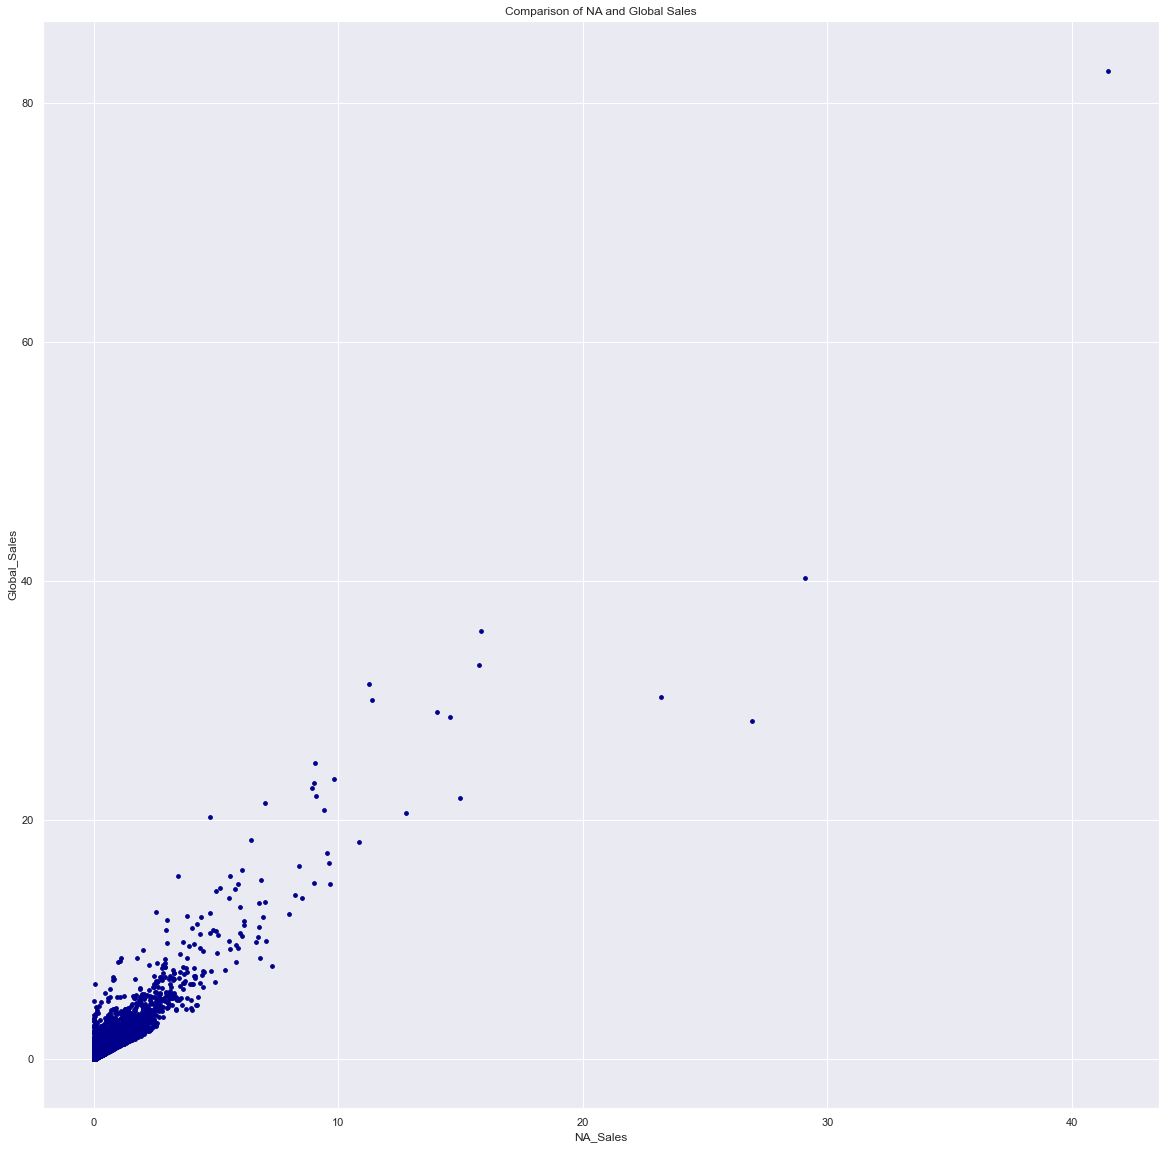

In [20]:
# draw scatter plots between the US sales + Global Sales
# draw scatter plots between the EU sales + Global Sales
# draw scatter plots between the JP sales + Global Sales
# draw scatter plots between the Other sales + Global Sales
# drawing scatter plots between all countries we have information on + global sales allows us to make a relation between the country's market and the overall global market
df2.plot.scatter(x = 'NA_Sales',
                 y = 'Global_Sales',
                 c = 'DarkBlue',
                 title = 'Comparison of NA and Global Sales',
                 s = 14
                 );

Based on the above scatter plot it can be seen that there is a fairly positive relation between North American and global sales. This shows a positive relationship between the countries market and the global market.

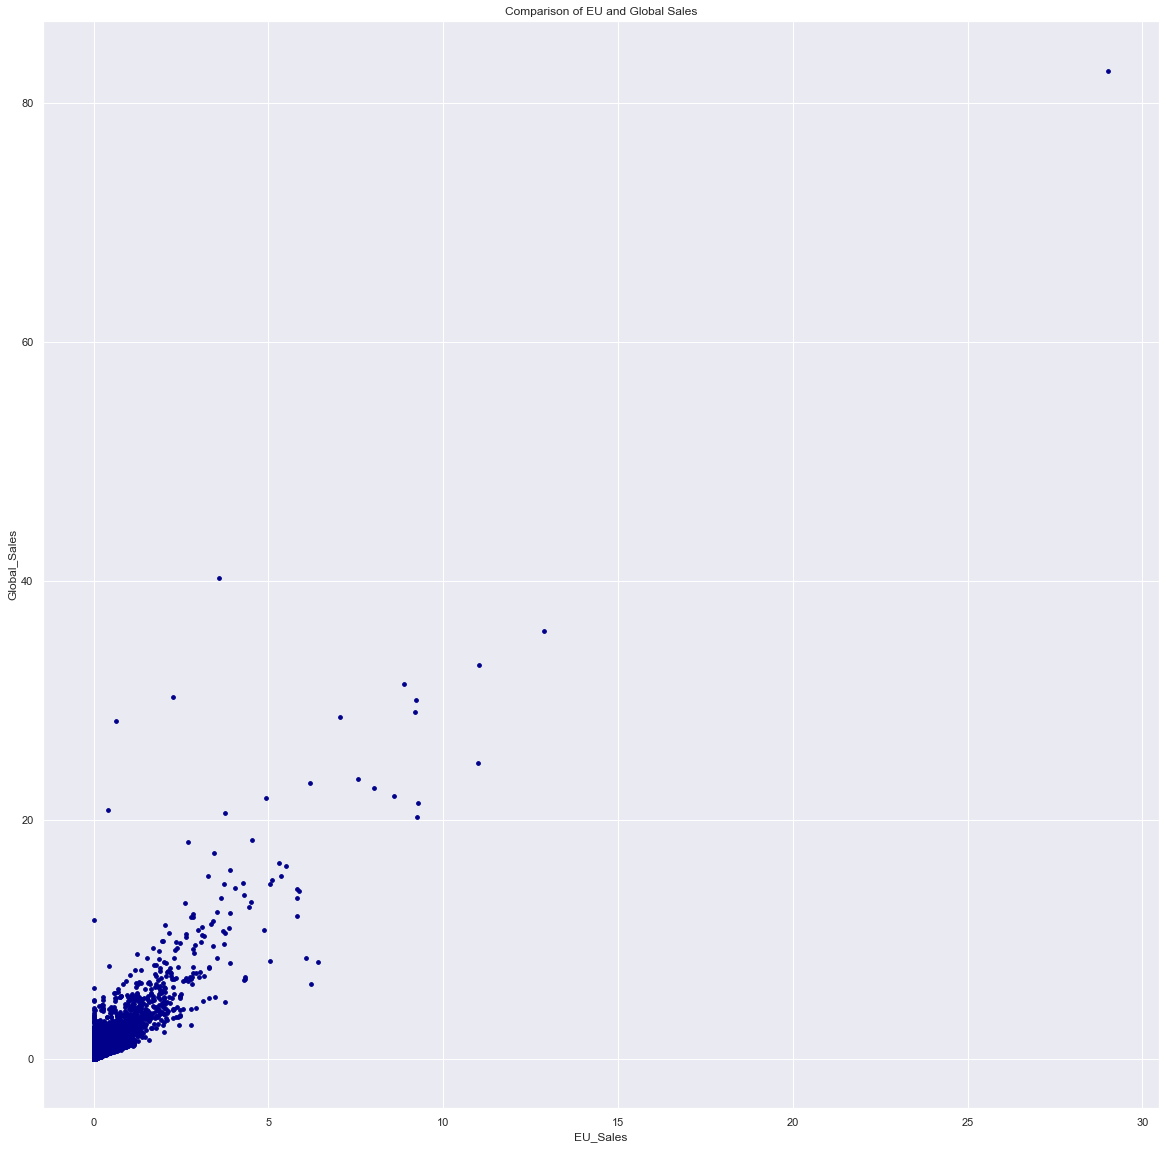

In [21]:
# draw scatter plots between the EU sales + Global Sales
df2.plot.scatter(x = 'EU_Sales',
                 y = 'Global_Sales',
                 c = 'DarkBlue',
                 title = 'Comparison of EU and Global Sales',
                 s = 14);

Based on the above scatter plot it can be seen that there is a fairly positive relation between European and global sales. This shows a positive relationship between the countries market and the global market.

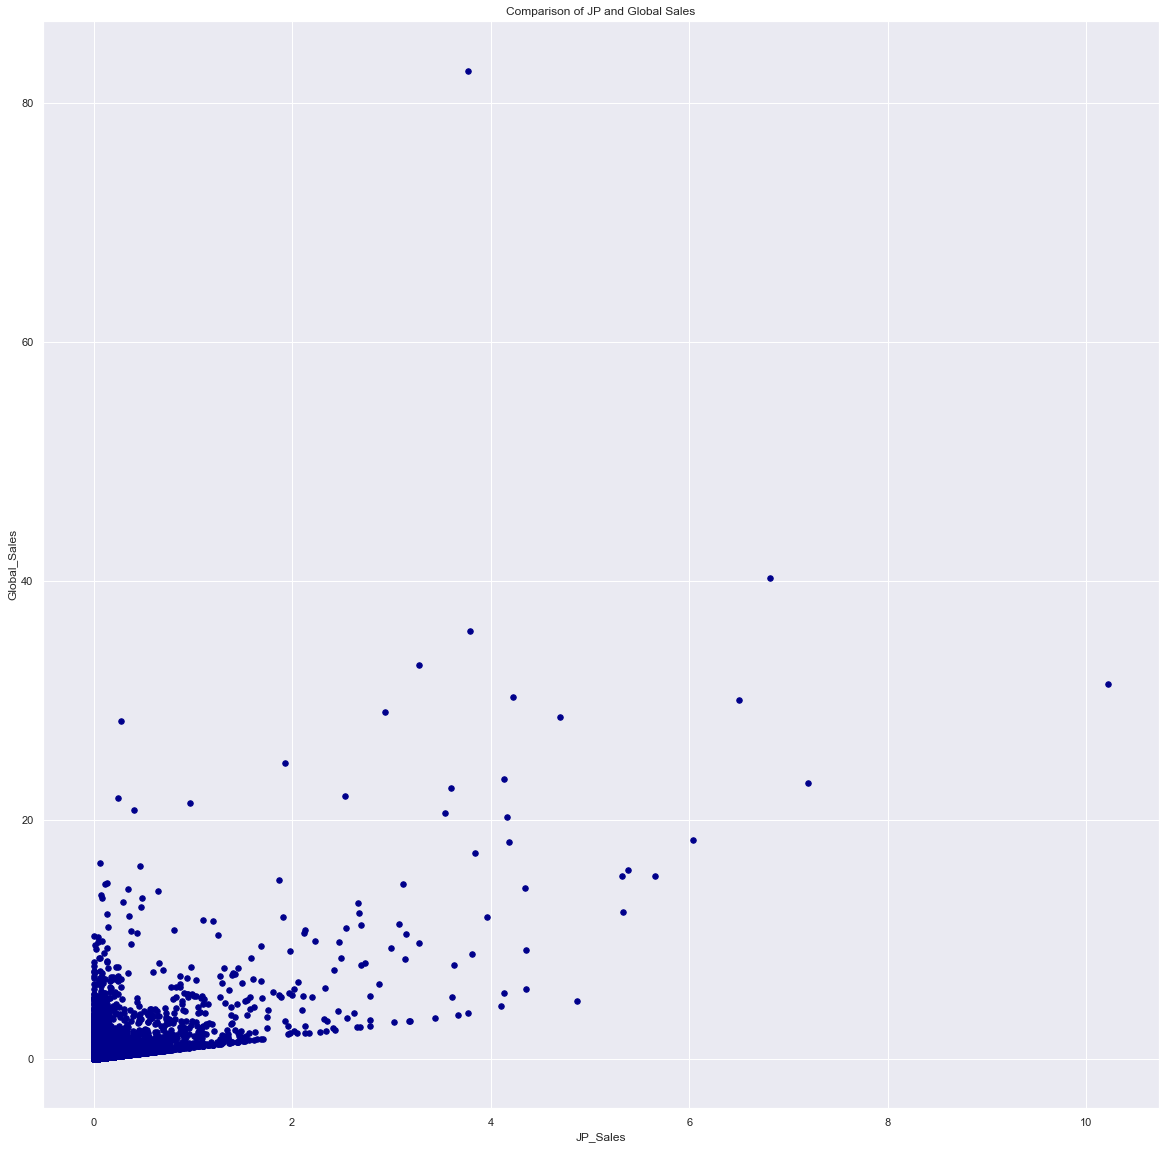

In [22]:
# draw scatter plots between the JP sales + Global Sales
df2.plot.scatter(x = 'JP_Sales',
                 y = 'Global_Sales',
                 c = 'DarkBlue',
                 title = 'Comparison of JP and Global Sales',
                 s = 30);

Based on the above scatter plot it can be seen, there is a *somewhat* positive relation between Japanese and global sales but not nearly as strong as European or North American sales. This would still show a positive relationship between the countries market and the global market, but it could be said that this is the weakest relationship amongst the information present about other countries.

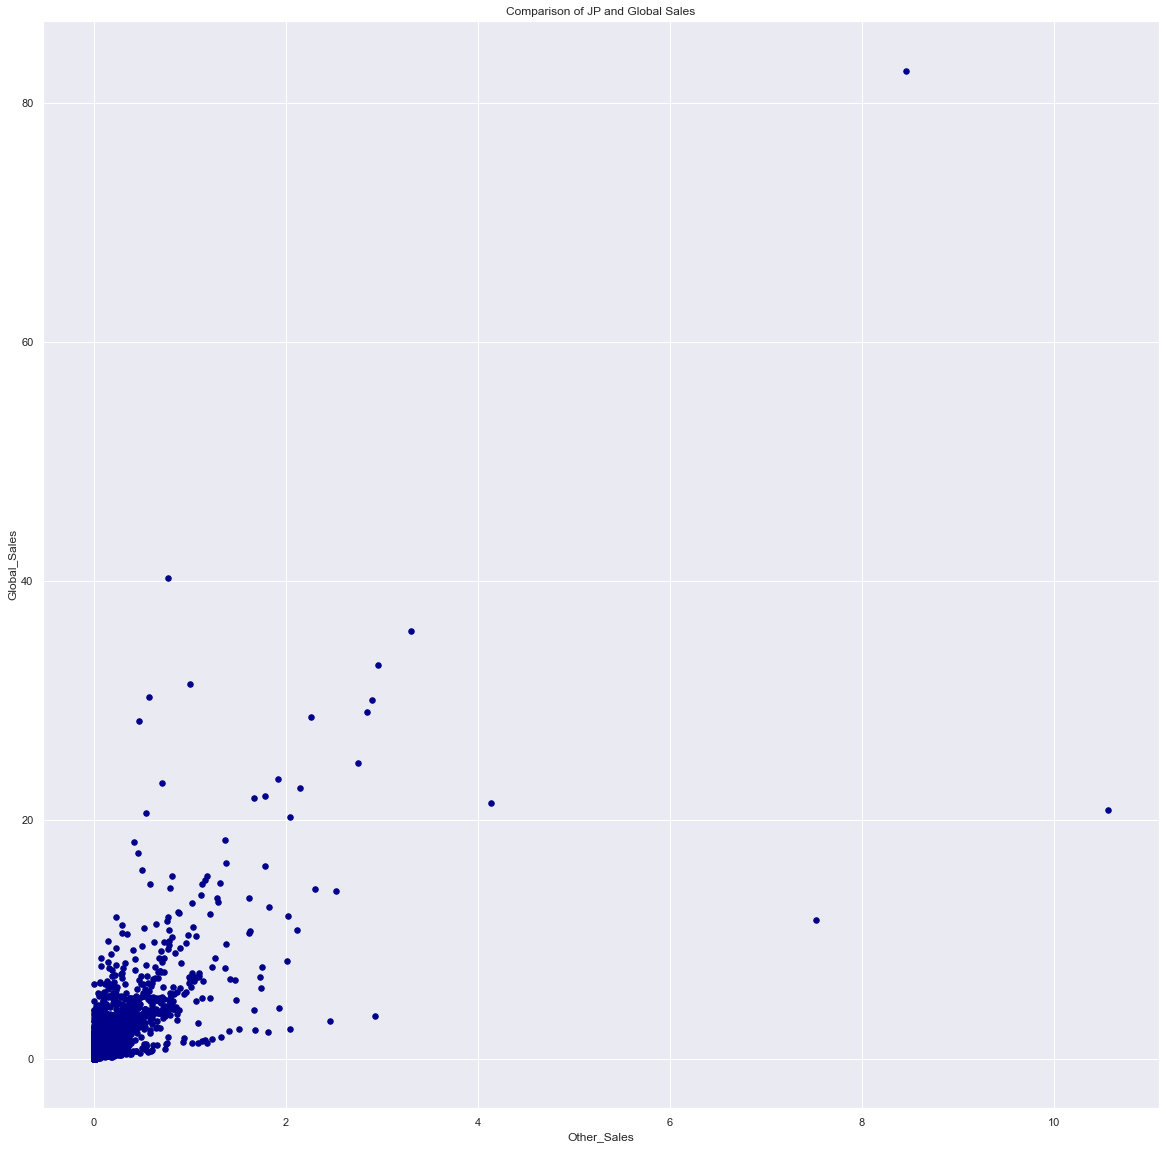

In [23]:
# draw scatter plots between the Other sales + Global Sales
df2.plot.scatter(x = 'Other_Sales',
                 y = 'Global_Sales',
                 c = 'DarkBlue',
                 title = 'Comparison of JP and Global Sales',
                 s = 30);

Again, based on the above scatter plot it can be seen that there is a *somewhat* positive relation between other countries and global sales. This would also still be considered to show a positive relationship between the countries market and the global market, but could be seen as one of the weaker relations but still not be considered the weakest.

## Bar Graphs

We have a few different columns or variables that could be considered categorical data or values. Categorical values can be described as: "Data types that are corresponding to categorical variables in statics. They take on limited, and usually a fixed number of possible values". In our second dataset we can see multiple categorical variables including: "Platform", "Genre" and "Publisher". Below we create several bar graphs to show the relation between each categorical variables present and the target (global sales / country sales).

In [28]:
dataCopy = df2
dataCopy.dropna(inplace=True)
dataCopy

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### Basket Platform Information
Video games and video game platforms have been around for decades and are continuing to release titles as the years pass. Due to this, the information regarding each of the video game platforms is so large and full of a substantial amount of data / information. It benefits us most to only use video game platforms that have been released within the last 10 years in order to better complete our analysis. We can complete this task by putting our information into groups or (baskets).

In [29]:
# for Platform we want to only look at the video game platforms released within the last 10 years
# we do this by filtering out the data - here we are searching for Xbox One games only
substring = 'XOne'
xboxOne = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
xboxOne

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
101,102,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,Activision,4.52,2.09,0.01,0.67,7.30
193,194,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,Activision,3.21,1.53,0.01,0.38,5.13
197,198,Grand Theft Auto V,XOne,2014.0,Action,Take-Two Interactive,2.66,2.01,0.00,0.41,5.08
260,261,Halo 5: Guardians,XOne,2015.0,Shooter,Microsoft Game Studios,2.64,1.20,0.03,0.39,4.26
287,288,Fallout 4,XOne,2015.0,Role-Playing,Bethesda Softworks,2.45,1.26,0.01,0.37,4.09
...,...,...,...,...,...,...,...,...,...,...,...
16530,16533,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,Milestone S.r.l,0.00,0.01,0.00,0.00,0.01
16531,16534,Hitman (2016),XOne,2016.0,Action,Square Enix,0.00,0.01,0.00,0.00,0.01
16562,16565,Mighty No. 9,XOne,2016.0,Platform,Deep Silver,0.01,0.00,0.00,0.00,0.01
16569,16572,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01


In [30]:
# for Platform we want to only look at the video game platforms released within the last 10 years
# we do this by filtering out the data - here we are searching for PS4 games only
substring = 'PS4'
PS4 = dataCopy[df2.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
PS4

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,94,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,Activision,2.80,3.30,0.14,1.37,7.60
...,...,...,...,...,...,...,...,...,...,...,...
16220,16223,Dynasty Warriors: Eiketsuden,PS4,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16260,16263,Paragon,PS4,2016.0,Action,Epic Games,0.01,0.00,0.00,0.00,0.01
16333,16336,Chaos;Child,PS4,2015.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01
16550,16553,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01


In [31]:
# for Platform we want to only look at the video game platforms released within the last 10 years
# we do this by filtering out the data
substring = 'PC'
PC = dataCopy[df2.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
PC

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
136,137,Street Fighter II: The World Warrior,SNES,1992.0,Fighting,Capcom,2.47,0.83,2.87,0.12,6.30
137,138,World of Warcraft,PC,2004.0,Role-Playing,Activision,0.07,6.21,0.00,0.00,6.28
161,162,Monster Hunter Freedom Unite,PSP,2008.0,Role-Playing,Capcom,0.47,0.57,4.13,0.34,5.50
181,182,Diablo III,PC,2012.0,Role-Playing,Activision,2.43,2.15,0.00,0.62,5.20
...,...,...,...,...,...,...,...,...,...,...,...
16569,16572,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16573,16576,Mini Desktop Racing,Wii,2007.0,Racing,Popcorn Arcade,0.01,0.00,0.00,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


In [32]:
# grouped_obj = df2.groupby(["Platform"])
# for key, item in grouped_obj:
#     print("Key is: " + str(key))
#     print(str(item), "\n\n")

In [33]:
# find sum and mean global sales for XboxOne grouped information
globalXboxSalesSum = xboxOne['Global_Sales'].sum() # calculate sum
globalXboxSalesMean = xboxOne['Global_Sales'].mean() # calculate mean
print("Sum: ", globalXboxSalesSum) # print sum
print("Mean: ", globalXboxSalesMean) # print mean

Sum:  141.06
Mean:  0.6622535211267603


In [34]:
# find sum and mean global sales for PS4 grouped information
globalPS4SalesSum = PS4['Global_Sales'].sum() # calculate sum
globalPS4SalesMean = PS4['Global_Sales'].mean() # calculate mean
print("Sum: ", globalPS4SalesSum) # print sum
print("Mean: ", globalPS4SalesMean) # print mean

Sum:  278.1
Mean:  0.8276785714285696


In [35]:
# find sum and mean global sales for PS4 grouped information
globalPCSalesSum = PC['Global_Sales'].sum() # calculate sum
globalPCSalesMean = PC['Global_Sales'].mean() # calculate mean
print("Sum: ", globalPCSalesSum) # print sum
print("Mean: ", globalPCSalesMean) # print mean

Sum:  466.08
Mean:  0.3473025335320372


In [36]:
# put the generated sums and means for each global sales for the video game platforms released within the last 10 years into a single array and graph the information
platformArraySum = [globalXboxSalesSum, globalPS4SalesSum, globalPCSalesSum]
platformArrayMean = [globalXboxSalesMean, globalPS4SalesMean, globalPCSalesMean]
print("Sum Array: ", platformArraySum) # print sum
print("Mean Array: ", platformArrayMean) # print sum

Sum Array:  [141.06, 278.1, 466.08]
Mean Array:  [0.6622535211267603, 0.8276785714285696, 0.3473025335320372]


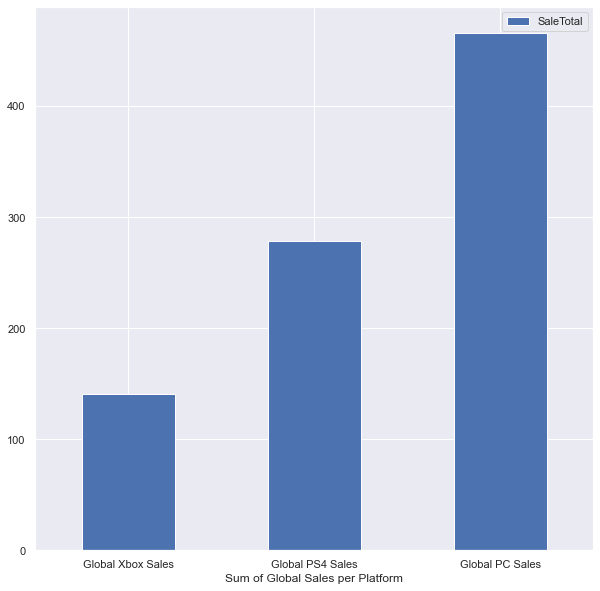

In [37]:
platformBarSum = pd.DataFrame({'Sum of Global Sales per Platform': ['Global Xbox Sales', 'Global PS4 Sales',
                                                                    'Global PC Sales',],
                               'SaleTotal': [globalXboxSalesSum, globalPS4SalesSum, globalPCSalesSum]})
ax = platformBarSum.plot.bar(x='Sum of Global Sales per Platform', y='SaleTotal', rot=0, figsize=(10, 10))

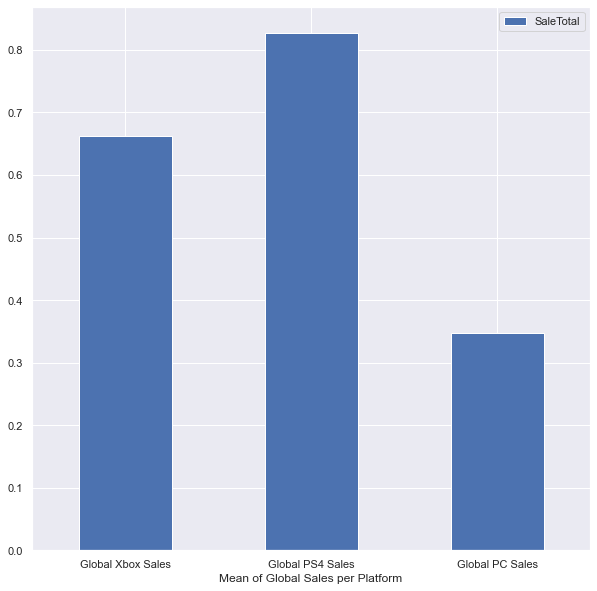

In [38]:
platformBarMean = pd.DataFrame({'Mean of Global Sales per Platform': ['Global Xbox Sales', 'Global PS4 Sales',
                                                                      'Global PC Sales'],
                                'SaleTotal': [globalXboxSalesMean, globalPS4SalesMean, globalPCSalesMean]})
ax = platformBarMean.plot.bar(x='Mean of Global Sales per Platform', y='SaleTotal', rot=0, figsize=(10, 10))

---
### Basket Publisher Information
Due to the fact that the information regarding the video game publishing companies is so large and full of an extensive and substantial amount of data / information. It benefits us most to just use the "first" five or top five video game publishing companies to complete our analysis. We can complete this task by putting our information into groups or (baskets).

In [39]:
# basket information for publisher
dataCopy['Publisher'].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: Publisher, Length: 576, dtype: int64

Take the top 5 categories from the Publisher categorical variable / value and basket this information to be graphed. We can do this by using the *.head()* method to display the first five (in our case the top 5) values.


In [40]:
# display the top 5 video game publishing companies
dataCopy['Publisher'].value_counts().head()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
Name: Publisher, dtype: int64

In [41]:
# for Publisher, we want to only look at the top five companies - the first being EA (Electronic Arts)
# we do this by filtering out the data - here we are searching for EA only
substring = 'Electronic Arts'
EA = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
EA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
82,83,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.24
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
99,100,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.13,0.06,0.69,7.34
...,...,...,...,...,...,...,...,...,...,...,...
16339,16342,Command & Conquer Renegade,PC,2002.0,Shooter,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16384,16387,Poker for Dummies,PC,2008.0,Misc,Electronic Arts,0.00,0.01,0.00,0.00,0.01
16413,16416,The Godfather (JP sales),X360,2006.0,Action,Electronic Arts,0.00,0.00,0.01,0.00,0.01
16539,16542,Spore Galactic Adventures,PC,2009.0,Strategy,Electronic Arts,0.00,0.01,0.00,0.00,0.01


In [42]:
# the second top publishing company is Activision
# filtering out the data - here we search for Activision only
substring = 'Activision'
Activision = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
Activision

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73
...,...,...,...,...,...,...,...,...,...,...,...
16411,16414,Teenage Mutant Ninja Turtles (3DS),3DS,2013.0,Action,Activision,0.01,0.00,0.00,0.00,0.01
16444,16447,Madagascar: Escape 2 Africa,PC,2008.0,Action,Activision,0.01,0.00,0.00,0.00,0.01
16501,16504,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010.0,Shooter,Activision,0.01,0.00,0.00,0.00,0.01
16537,16540,Transformers: Fall of Cybertron,PC,2012.0,Action,Activision,0.01,0.00,0.00,0.00,0.01


In [43]:
# the third top publishing company is Ubisoft
# filtering out the data - here we search for Ubisoft only
substring = 'Ubisoft'
Ubisoft = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
Ubisoft

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26
68,69,Just Dance 2,Wii,2010.0,Misc,Ubisoft,5.84,2.89,0.01,0.78,9.52
102,103,Just Dance,Wii,2009.0,Misc,Ubisoft,3.51,3.03,0.00,0.73,7.27
111,112,Just Dance 4,Wii,2012.0,Misc,Ubisoft,4.14,2.21,0.00,0.56,6.91
128,129,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.56,0.16,1.14,6.50
...,...,...,...,...,...,...,...,...,...,...,...
16505,16508,Rabbids Invasion: The Interactive TV Show,XOne,2014.0,Misc,Ubisoft,0.00,0.01,0.00,0.00,0.01
16514,16517,National Geographic Panda (JP sales),DS,2008.0,Simulation,Ubisoft,0.00,0.00,0.01,0.00,0.01
16544,16547,Imagine Figure Skater (JP sales),DS,2007.0,Sports,Ubisoft,0.00,0.00,0.01,0.00,0.01
16584,16587,Bust-A-Move 3000,GC,2003.0,Puzzle,Ubisoft,0.01,0.00,0.00,0.00,0.01


In [44]:
# the fourth top publishing company is Namco Bandai Games
# filtering out the data - here we search for Namco Bandai Games only
substring = 'Namco Bandai Games'
NamcoBandai = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
NamcoBandai

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
264,265,Namco Museum,GBA,2001.0,Misc,Namco Bandai Games,3.00,1.11,0.05,0.07,4.24
294,295,Tekken Tag Tournament,PS2,2000.0,Fighting,Namco Bandai Games,1.68,1.51,0.51,0.35,4.05
302,303,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,Namco Bandai Games,2.08,1.35,0.00,0.54,3.98
311,312,Tekken 5,PS2,2005.0,Fighting,Namco Bandai Games,0.93,1.94,0.31,0.70,3.87
331,332,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,0.96,2.00,0.21,0.56,3.73
...,...,...,...,...,...,...,...,...,...,...,...
16523,16526,Style Book: Cinnamoroll,DS,2006.0,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16529,16532,Hirameki Action: Chibikko Wagyan no Daiki na B...,DS,2009.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16535,16538,Mushi Bugyou,3DS,2013.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16550,16553,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01


In [45]:
# the fourth top publishing company is Konami Digital Entertainment
# filtering out the data - here we search for Konami Digital Entertainment only
substring = 'Konami Digital Entertainment'
Konami = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
Konami

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
142,143,Metal Gear Solid 2: Sons of Liberty,PS2,2001.0,Action,Konami Digital Entertainment,2.45,2.01,0.87,0.72,6.05
144,145,Metal Gear Solid 4: Guns of the Patriots,PS3,2008.0,Action,Konami Digital Entertainment,2.63,1.74,0.83,0.83,6.03
145,146,Metal Gear Solid,PS,1998.0,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24,6.03
249,250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.39
265,266,Metal Gear Solid 3: Snake Eater,PS2,2004.0,Action,Konami Digital Entertainment,1.46,0.00,0.83,1.93,4.23
...,...,...,...,...,...,...,...,...,...,...,...
16426,16429,ESPN NBA 2Night 2002,XB,2002.0,Sports,Konami Digital Entertainment,0.01,0.00,0.00,0.00,0.01
16437,16440,The Cages: Pro Style Batting Practice,Wii,2010.0,Sports,Konami Digital Entertainment,0.01,0.00,0.00,0.00,0.01
16517,16520,Teenage Mutant Ninja Turtles,Wii,2007.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16533,16536,Metal Gear Solid HD Edition,X360,2011.0,Action,Konami Digital Entertainment,0.00,0.00,0.01,0.00,0.01


Find sum(s) for our basket-ed information we calculated above.

In [46]:
# find sum and mean global sales for EA grouped information
globalEASum = EA['Global_Sales'].sum() # calculate sum
globalEAMean = EA['Global_Sales'].mean() # calculate mean
print("Sum: ", globalEASum) # print sum
print("Mean: ", globalEAMean) # print mean

Sum:  1093.81
Mean:  0.8156674123788189


In [47]:
# find sum and mean global sales for Activision grouped information
globalActivisionSum = Activision['Global_Sales'].sum() # calculate sum
globalActivisionMean = Activision['Global_Sales'].mean() # calculate mean
print("Sum: ", globalActivisionSum) # print sum
print("Mean: ", globalActivisionMean) # print mean

Sum:  728.8499999999999
Mean:  0.7317771084337327


In [48]:
# find sum and mean global sales for Ubisoft grouped information
globalUbisoftSum = Ubisoft['Global_Sales'].sum() # calculate sum
globalUbisoftMean = Ubisoft['Global_Sales'].mean() # calculate mean
print("Sum: ", globalUbisoftSum) # print sum
print("Mean: ", globalUbisoftMean) # print mean

Sum:  478.00000000000006
Mean:  0.5128755364806861


In [49]:
# find sum and mean global sales for Namco grouped information
globalNamcoSum = NamcoBandai['Global_Sales'].sum() # calculate sum
globalNamcoMean = NamcoBandai['Global_Sales'].mean() # calculate mean
print("Sum: ", globalNamcoSum) # print sum
print("Mean: ", globalNamcoMean) # print mean

Sum:  253.65
Mean:  0.27332974137931126


In [50]:
# find sum and mean global sales for Konami grouped information
globalKonamiSum = Konami['Global_Sales'].sum() # calculate sum
globalKonamiMean = Konami['Global_Sales'].mean() # calculate mean
print("Sum: ", globalKonamiSum) # print sum
print("Mean: ", globalKonamiMean) # print mean

Sum:  278.56
Mean:  0.33846901579586636


In [51]:
# put the generated sums and means for each global sales for the top 5 video game genres into a single array and graph the information
publisherArraySum = [globalEASum, globalActivisionSum, globalUbisoftSum, globalNamcoSum, globalKonamiSum]
publisherArrayMean = [globalEAMean, globalActivisionMean, globalUbisoftMean, globalNamcoMean, globalKonamiMean]
print("Sum Array: ", publisherArraySum) # print sum
print("Mean Array: ", publisherArrayMean) # print sum

Sum Array:  [1093.81, 728.8499999999999, 478.00000000000006, 253.65, 278.56]
Mean Array:  [0.8156674123788189, 0.7317771084337327, 0.5128755364806861, 0.27332974137931126, 0.33846901579586636]


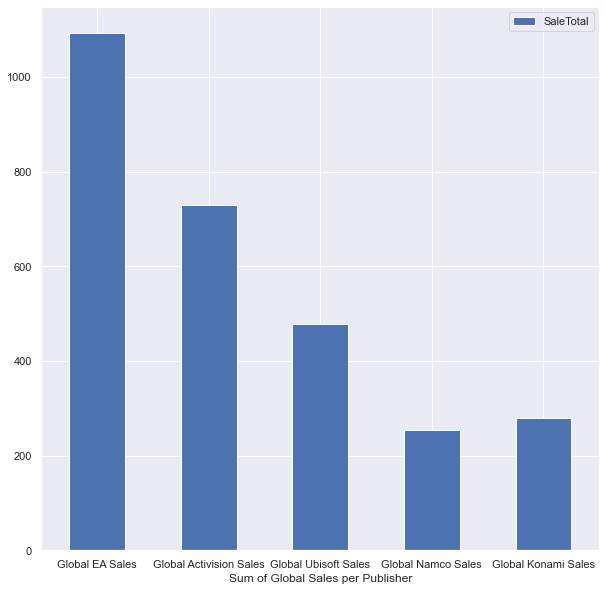

In [52]:
publisherBarSum = pd.DataFrame({'Sum of Global Sales per Publisher': ['Global EA Sales', 'Global Activision Sales',
                                                                      'Global Ubisoft Sales', 'Global Namco Sales',
                                                                      'Global Konami Sales'],
                                'SaleTotal': [globalEASum, globalActivisionSum, globalUbisoftSum, globalNamcoSum, globalKonamiSum]})
ax = publisherBarSum.plot.bar(x='Sum of Global Sales per Publisher', y='SaleTotal', rot=0, figsize=(10, 10))

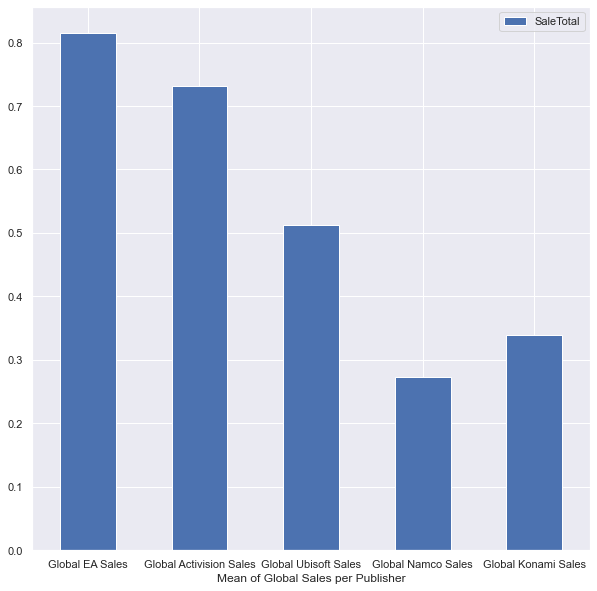

In [53]:
publisherBarMean = pd.DataFrame({'Mean of Global Sales per Publisher': ['Global EA Sales', 'Global Activision Sales',
                                                                        'Global Ubisoft Sales', 'Global Namco Sales',
                                                                        'Global Konami Sales'],
                                 'SaleTotal': [globalEAMean, globalActivisionMean, globalUbisoftMean, globalNamcoMean, globalKonamiMean]})
ax = publisherBarMean.plot.bar(x='Mean of Global Sales per Publisher', y='SaleTotal', rot=0, figsize=(10, 10))

---
### Basket Genre Information
Due to the fact that the information regarding the different type of video game genres is so large and full of an extensive and substantial amount of data / information. It benefits us most to just use the "first" five or top five most popular video game genres in order to better complete our analysis. We can complete this task by putting our information into groups or (baskets).

In [54]:
# basket information for publisher
dataCopy['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

Take the top 5 categories from the Genre categorical variable / value and basket this information to be graphed. We can do this by using the *.head()* method to display the first five (in our case the top 5) values.

In [55]:
# display the top 5 video game publishing companies
dataCopy['Genre'].value_counts().head()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Name: Genre, dtype: int64

In [56]:
# for Genre, we want to only look at the top five most popular video game genres - the first being Action
# we do this by filtering out the data - here we are searching for the Action genre only
substring = 'Action'
Action = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
Action

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
38,39,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
...,...,...,...,...,...,...,...,...,...,...,...
16564,16567,Original Frisbee Disc Sports: Ultimate & Golf,DS,2007.0,Action,"Destination Software, Inc",0.01,0.00,0.00,0.00,0.01
16567,16570,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16582,16585,Planet Monsters,GBA,2001.0,Action,Titus,0.01,0.00,0.00,0.00,0.01
16583,16586,Carmageddon 64,N64,1999.0,Action,Virgin Interactive,0.01,0.00,0.00,0.00,0.01


In [57]:
# for Genre, we want to only look at the top five most popular video game genres - the second being Sports
# we do this by filtering out the data - here we are searching for the Sports genre only
substring = 'Sports'
Sports = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
Sports

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
...,...,...,...,...,...,...,...,...,...,...,...
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16578,16581,Outdoors Unleashed: Africa 3D,3DS,2011.0,Sports,Mastiff,0.01,0.00,0.00,0.00,0.01
16579,16582,PGA European Tour,N64,2000.0,Sports,Infogrames,0.01,0.00,0.00,0.00,0.01
16581,16584,Fit & Fun,Wii,2011.0,Sports,Unknown,0.00,0.01,0.00,0.00,0.01


In [58]:
# for Genre, we want to only look at the top five most popular video game genres - the third being Misc
# we do this by filtering out the data - here we are searching for the Misc genre only
substring = 'Misc'
Misc = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
Misc

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
60,61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,6.05,3.15,0.00,1.07,10.26
68,69,Just Dance 2,Wii,2010.0,Misc,Ubisoft,5.84,2.89,0.01,0.78,9.52
...,...,...,...,...,...,...,...,...,...,...,...
16516,16519,DJ Max Technika Tune,PSV,2012.0,Misc,CyberFront,0.00,0.00,0.01,0.00,0.01
16519,16522,Bakumatsu Rock: Ultra Soul,PSP,2014.0,Misc,Marvelous Interactive,0.00,0.00,0.01,0.00,0.01
16523,16526,Style Book: Cinnamoroll,DS,2006.0,Misc,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01
16536,16539,Patrician IV: Gold Edition,PC,2011.0,Misc,Kalypso Media,0.00,0.01,0.00,0.00,0.01


In [59]:
# for Genre, we want to only look at the top five most popular video game genres - the fourth being Role-Playing
# we do this by filtering out the data - here we are searching for the Role-Playing genre only
substring = 'Role-Playing'
RP = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
RP

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
12,13,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
25,26,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.85
26,27,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
...,...,...,...,...,...,...,...,...,...,...,...
16515,16518,Knights in the Nightmare: DHE Series Special Pack,DS,2008.0,Role-Playing,Sting,0.00,0.00,0.01,0.00,0.01
16520,16523,Tengai Makyo: Dai Yon no Mokushiroku,PSP,2006.0,Role-Playing,Hudson Soft,0.00,0.00,0.01,0.00,0.01
16525,16528,Blazer Drive,DS,2008.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
16556,16559,Super Robot Taisen: Original Generation,GBA,2002.0,Role-Playing,Banpresto,0.01,0.00,0.00,0.00,0.01


In [60]:
# for Genre, we want to only look at the top five most popular video game genres - the fourth being Shooter
# we do this by filtering out the data - here we are searching for the Shooter genre only
substring = 'Shooter'
Shooter = dataCopy[dataCopy.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
Shooter

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
34,35,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.03
...,...,...,...,...,...,...,...,...,...,...,...
16501,16504,"Transformers: War for Cybertron (XBox 360, PS3...",PC,2010.0,Shooter,Activision,0.01,0.00,0.00,0.00,0.01
16569,16572,Resident Evil 4 HD,XOne,2016.0,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


Find sum(s) for our basket-ed information we calculated above.


In [61]:
# find sum for global sales for Action genre grouped information
globalActionSum = Action['Global_Sales'].sum() # calculate sum
globalActionMean = Action['Global_Sales'].mean() # calculate mean
print("Sum: ", globalActionSum) # print sum
print("Mean: ", globalActionMean) # print mean

Sum:  1733.5400000000002
Mean:  0.5298105134474237


In [62]:
# find sum for global sales for Sports genre grouped information
globalSportsSum = Sports['Global_Sales'].sum() # calculate sum
globalSportsMean = Sports['Global_Sales'].mean() # calculate mean
print("Sum: ", globalSportsSum) # print sum
print("Mean: ", globalSportsMean) # print mean

Sum:  1312.27
Mean:  0.5671002592912652


In [63]:
# find sum for global sales for Misc genre grouped information
globalMiscSum = Misc['Global_Sales'].sum() # calculate sum
globalMiscMean = Misc['Global_Sales'].mean() # calculate mean
print("Sum: ", globalMiscSum) # print sum
print("Mean: ", globalMiscMean) # print mean

Sum:  790.5000000000001
Mean:  0.46802841918294485


In [64]:
# find sum for global sales for Role-playing genre grouped information
globalRPSum = RP['Global_Sales'].sum() # calculate sum
globalRPMean = RP['Global_Sales'].mean() # calculate mean
print("Sum: ", globalRPSum) # print sum
print("Mean: ", globalRPMean) # print mean

Sum:  923.83
Mean:  0.6284557823129212


In [65]:
# find sum for global sales for Shooter genre grouped information
globalShooterSum = Shooter['Global_Sales'].sum() # calculate sum
globalShooterMean = Shooter['Global_Sales'].mean() # calculate mean
print("Sum: ", globalShooterSum) # print sum
print("Mean: ", globalShooterMean) # print mean

Sum:  1026.35
Mean:  0.7999610288386559


In [66]:
# put the generated sums for each global sales for the top 5 video game genres into a single array and graph the information
genreArraySum = [globalActionSum, globalSportsSum, globalMiscSum, globalRPSum, globalShooterSum]
genreArrayMean = [globalActionMean, globalSportsMean, globalMiscMean, globalRPMean, globalShooterMean]
print("Sum Array: ", genreArraySum) # print sum
print("Mean Array: ", genreArrayMean) # print sum

Sum Array:  [1733.5400000000002, 1312.27, 790.5000000000001, 923.83, 1026.35]
Mean Array:  [0.5298105134474237, 0.5671002592912652, 0.46802841918294485, 0.6284557823129212, 0.7999610288386559]


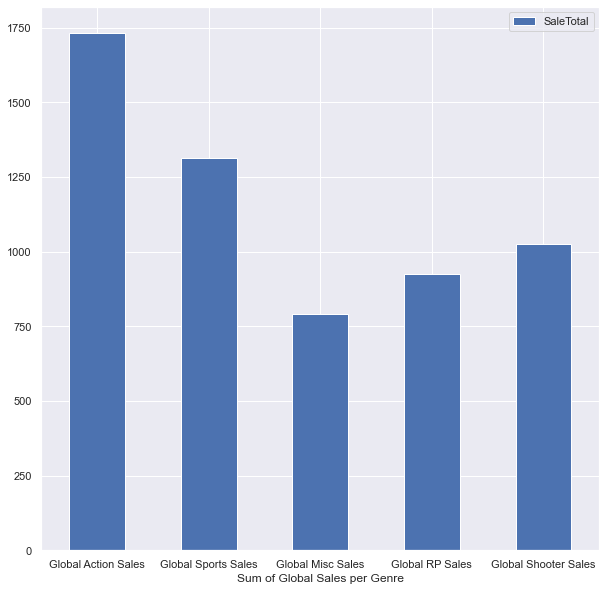

In [67]:
genreBarSum = pd.DataFrame({'Sum of Global Sales per Genre': ['Global Action Sales', 'Global Sports Sales',
                                                              'Global Misc Sales', 'Global RP Sales',
                                                              'Global Shooter Sales'],
                            'SaleTotal': [globalActionSum, globalSportsSum, globalMiscSum, globalRPSum, globalShooterSum]})
ax = genreBarSum.plot.bar(x='Sum of Global Sales per Genre', y='SaleTotal', rot=0, figsize=(10, 10))

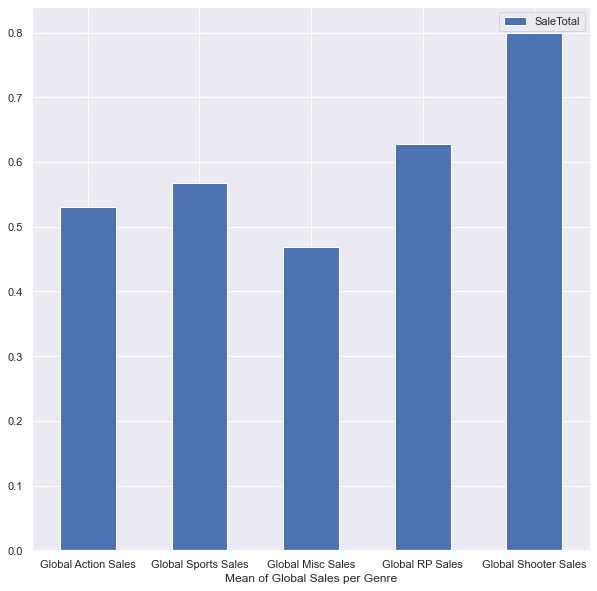

In [68]:
genreBarMean = pd.DataFrame({'Mean of Global Sales per Genre': ['Global Action Sales', 'Global Sports Sales',
                                                                'Global Misc Sales', 'Global RP Sales',
                                                                'Global Shooter Sales'],
                             'SaleTotal': [globalActionMean, globalSportsMean, globalMiscMean, globalRPMean, globalShooterMean]})
ax = genreBarMean.plot.bar(x='Mean of Global Sales per Genre', y='SaleTotal', rot=0, figsize=(10, 10))